# Chapter 1 - Data Science Projects with Python

---
This is the first chapter of the book data science project and it seems to be following the traditional method of using a notebook for doing everything which is frustrating. 


In [1]:
# basic imports
import os 
import sys
import pandas as pd
import numpy as np

In [2]:
configs = os.path.abspath('../')
if configs not in sys.path:
    sys.path.insert(0,configs)

#from utils.utilities import display

In [3]:
from utils.utilities import display

## 1. Data Explorations steps to follow:
***
> 1. What is the shape of the data
  >> - number of rows and columns
> 2. Are there any missing values
> 3. Are there any duplicates per row
> 4. What are the column type - is this what is expected
---

In [4]:
df = pd.read_excel('../data/raw/default_of_credit_card_clients__courseware_version_1_21_19.xls')

1. `Rows` and `columns` view

In [5]:
print(f'Rows = {df.shape[0]:,.0f} \ncols = {df.shape[1]}, \nfullshape = {df.shape} ')

Rows = 30,000 
cols = 25, 
fullshape = (30000, 25) 


#### a. **Missing** data 

In [6]:
df.isnull().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_1                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

#### b. checking **_duplicates_**

In [7]:
df.duplicated().sum()

0

#### c. Checking ```Datatypes``` ,`head` and `tail`

In [8]:
df.dtypes.value_counts()

int64     23
object     2
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [10]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [11]:
df.tail(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,15d69f9f-5ad3,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [12]:
## view columns and unique customers

#### D. See if we have all unique customers (specifically ID col) as expected

In [13]:
df['ID'].duplicated().sum()

313

In [14]:
df['ID'].nunique()

29687

In [15]:
df[df['ID'].duplicated()].head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
(df[df['ID'].duplicated()].sort_values('ID')).tail(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2105,ffa0f012-3bd7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8846,ffb9a143-c375,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
zeros_mask = (df.iloc[:,1:]==0).all(axis=1)
df_clean =  df.loc[~zeros_mask,:].copy()

In [18]:
df_clean.shape

(29685, 25)

In [19]:
df_clean.duplicated().sum()

0

##### Working on the PAY_1 variable becuase it was the only one typed as object

In [20]:
df_clean.dtypes

ID                            object
LIMIT_BAL                      int64
SEX                            int64
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_1                         object
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month     int64
dtype: object

In [21]:
df_clean['PAY_1'].unique()

array([2, -1, 0, -2, 1, 'Not available', 3, 4, 8, 7, 5, 6], dtype=object)

In [22]:
pd.concat([df_clean['PAY_1'].value_counts(dropna=False),
           df_clean['PAY_2'].value_counts(dropna=False),
           df_clean['PAY_3'].value_counts(dropna=False),
           df_clean['PAY_4'].value_counts(dropna=False),
           df_clean['PAY_5'].value_counts(dropna=False),
           df_clean['PAY_6'].value_counts(dropna=False)],axis=1,keys=['PAY_1',
                                                                      'PAY_2',
                                                                      'PAY_3',
                                                                      'PAY_4',
                                                                      'PAY_5',
                                                                      'PAY_6'])

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,13087,15563.0,15599.0,16285.0,16754.0,16093.0
-1,5047,5989.0,5869.0,5624.0,5488.0,5686.0
1,3261,28.0,4.0,2.0,NaN,NaN
Not available,3021,NaN,NaN,NaN,NaN,NaN
-2,2476,3746.0,4046.0,4309.0,4503.0,4849.0
2,2378,3878.0,3782.0,3121.0,2603.0,2749.0
3,292,325.0,237.0,180.0,177.0,181.0
4,63,99.0,74.0,66.0,81.0,48.0
5,23,24.0,21.0,34.0,17.0,13.0
8,17,1.0,3.0,2.0,1.0,2.0


**Discussion**: We observe that despite the lack of definition the value `-2` seems to be available in all of the variables and might have meaning. `Not available` might be a null value, thus we can replacee with `np.nan`

i.e


| Value | Strategy   |
| ------|------------|
|-2    | leave value and investigate further|
| Not available | replace with np.nan |

In [23]:
not_available_mask =  df_clean['PAY_1']=='Not available'

In [24]:
df_clean.loc[not_available_mask,:].head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
17,f0ba5e02-0c0f,320000,1,1,1,49,Not available,0,0,-1,...,70074,5856,195599,10358,10000,75940,20000,195599,50000,0
28,aecb449b-a999,50000,2,3,1,47,Not available,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0


In [25]:
df_clean.loc[not_available_mask,:].tail(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29973,31c0c152-e5ac,230000,1,2,1,35,Not available,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
29984,3aee2b22-6bd0,30000,1,2,2,38,Not available,-1,-2,-1,...,1993,1907,3319,923,2977,1999,3057,3319,1000,0


In [26]:
df_clean.loc[not_available_mask,'PAY_1']=np.nan

In [27]:
((df_clean.isnull().sum())/df_clean.shape[0])*100

ID                             0.000000
LIMIT_BAL                      0.000000
SEX                            0.000000
EDUCATION                      0.000000
MARRIAGE                       0.000000
AGE                            0.000000
PAY_1                         10.176857
PAY_2                          0.000000
PAY_3                          0.000000
PAY_4                          0.000000
PAY_5                          0.000000
PAY_6                          0.000000
BILL_AMT1                      0.000000
BILL_AMT2                      0.000000
BILL_AMT3                      0.000000
BILL_AMT4                      0.000000
BILL_AMT5                      0.000000
BILL_AMT6                      0.000000
PAY_AMT1                       0.000000
PAY_AMT2                       0.000000
PAY_AMT3                       0.000000
PAY_AMT4                       0.000000
PAY_AMT5                       0.000000
PAY_AMT6                       0.000000
default payment next month     0.000000


# 2 Data Visualisation

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['figure.dpi'] = 100

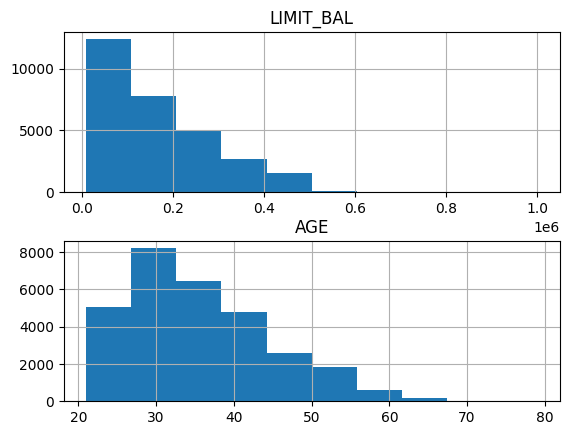

In [29]:
df_clean[['LIMIT_BAL','AGE']].hist(layout=(1,2))
plt.show()

In [30]:
df_clean[['LIMIT_BAL','AGE']].describe()

,LIMIT_BAL,AGE
count,29685.000000,29685.000000
mean,167519.948796,35.481354
std,129716.478534,9.212199
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,1000000.000000,79.000000


In [31]:
for col in df_clean.columns:
    if df_clean[col].dtypes == 'object':
        print(col)

ID
PAY_1


In [32]:
df_clean.columns =  df_clean.columns.str.lower()

In [33]:
df_clean['education'].value_counts()

education
2    13884
1    10474
3     4867
5      275
4      122
6       49
0       14
Name: count, dtype: int64

In [34]:
df_clean['marriage'].value_counts()

marriage
2    15810
1    13503
3      318
0       54
Name: count, dtype: int64

In [35]:
df_clean['sex'].value_counts()

sex
2    17910
1    11775
Name: count, dtype: int64

In [36]:
#pd.DataFrame({col:df_clean[col].nunique() for col in df_clean.columns},index=range(1)).T

<Axes: >

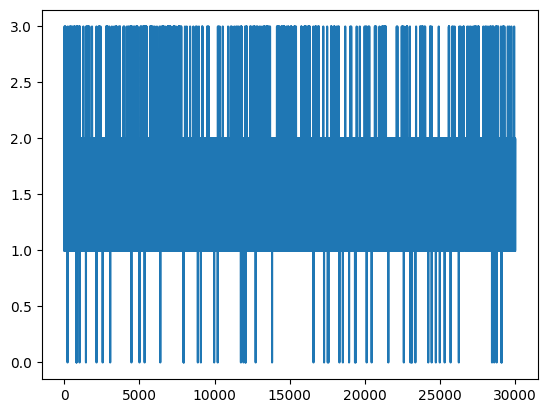

In [37]:
#df_clean['marriage'].plot()

In [38]:
df_clean.loc[df_clean['education'].isin([5,6,0]),'education']=4

In [39]:
df_clean.loc[df_clean['marriage']==0,'marriage']=3

In [40]:
df_clean['education'].value_counts()

education
2    13884
1    10474
3     4867
4      460
Name: count, dtype: int64

In [41]:
df_clean['marriage'].value_counts()

marriage
2    15810
1    13503
3      372
Name: count, dtype: int64

In [42]:
df_clean.shape

(29685, 25)

In [43]:
df_clean.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object')

<Axes: xlabel='education'>

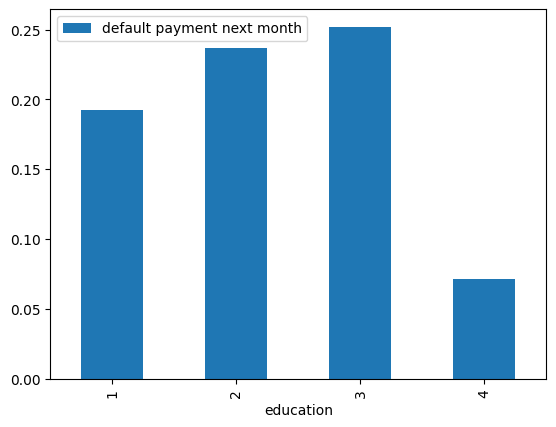

In [44]:
df_clean.groupby('education').agg({'default payment next month':'mean'}).plot(kind='bar')

<Axes: xlabel='marriage'>

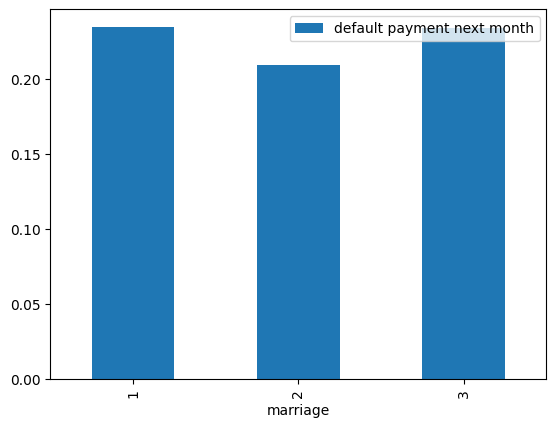

In [45]:
df_clean.groupby('marriage').agg({'default payment next month':'mean'}).plot(kind='bar')

In [46]:
edu_ohe = pd.get_dummies(df_clean['education'].map({1:'graduate school', 2:'university',
                                                    3:'high school',
                                                    4:'others'}))

In [47]:
df_with_ohe = pd.concat([df_clean,edu_ohe],axis=1)

In [48]:
df_with_ohe.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,1,False,False,False,True
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,False,False,False,True
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,False,False,False,True
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,False,False,False,True
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,False,False,False,True


In [49]:
df_with_ohe.to_csv('../data/Chapter_1_cleaned_data.csv',index=False)

In [50]:
df_with_ohe.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month', 'graduate school', 'high school',
       'others', 'university'],
      dtype='object')

In [51]:
pay_feats = ['pay_1','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [52]:
import seaborn as sns

<Axes: xlabel='pay_1', ylabel='count'>

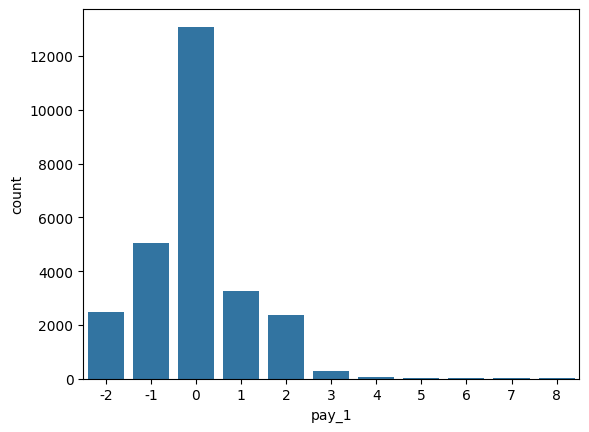

In [53]:
sns.countplot(df_with_ohe,x= 'pay_1')

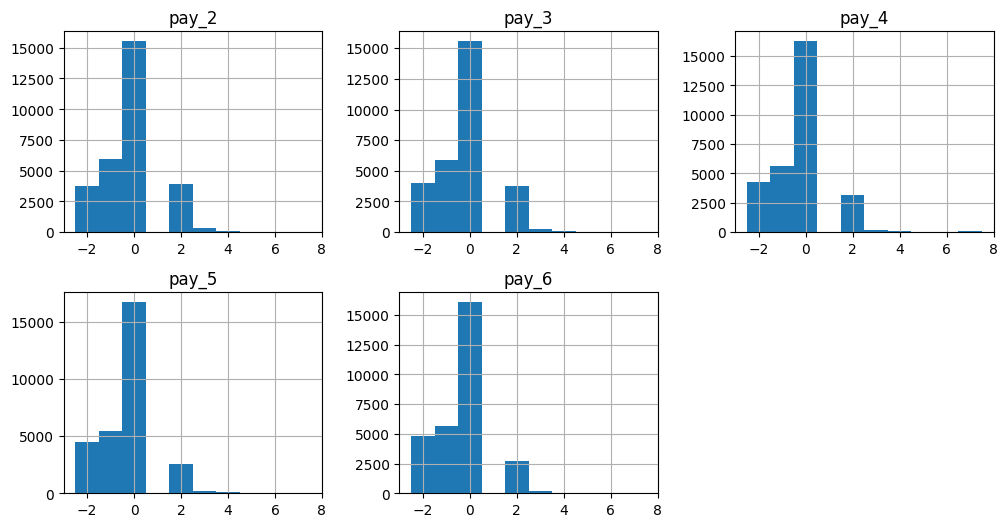

In [54]:
pay_feats = ['pay_1','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
bin_range =  np.arange(-2,9) - 0.5
df_with_ohe[pay_feats].hist(bins=bin_range,layout=(2,3),figsize=(12,6))
plt.show()

In [55]:
pay_amt = ['pay_amt1','pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

In [56]:
df_with_ohe.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month', 'graduate school', 'high school',
       'others', 'university'],
      dtype='object')

In [57]:
df_with_ohe[pay_amt].describe()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,29685.000000,2.968500e+04,29685.000000,29685.000000,29685.000000,29685.000000
mean,5672.886812,5.917545e+03,5229.295570,4826.770827,4805.203840,5219.023008
std,16616.452239,2.310628e+04,17650.360969,15607.256127,15311.798994,17798.365183
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.320000e+02,390.000000,296.000000,250.000000,115.000000
50%,2100.000000,2.008000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5007.000000,5.000000e+03,4508.000000,4015.000000,4041.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [58]:
df_with_ohe[pay_amt].head()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679


In [59]:
df_with_ohe[pay_amt].tail()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
29995,8500,20000,5003,3047,5000,1000
29996,1837,3526,8998,129,0,0
29997,0,0,22000,4200,2000,3100
29998,85900,3409,1178,1926,52964,1804
29999,2078,1800,1430,1000,1000,1000


In [60]:
mpl.rcParams['font.size']=10

In [61]:
zero_vals = (df_with_ohe[pay_amt] == 0)

In [62]:
zero_vals.sum()

pay_amt1    5189
pay_amt2    5348
pay_amt3    5908
pay_amt4    6345
pay_amt5    6640
pay_amt6    7101
dtype: int64

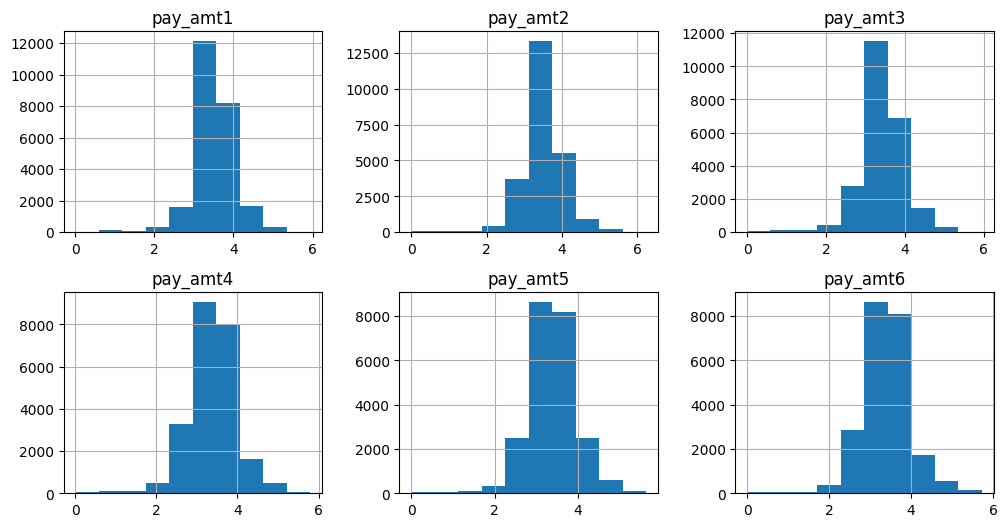

In [63]:
np.log10(df_with_ohe[pay_amt][~zero_vals]).hist(layout=(2,3),figsize=(12,6))
plt.show()